In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from  scipy.optimize import curve_fit

In [386]:
df = pd.read_csv("SFHx)_Data_points")
energy = df.iloc[:,0].to_numpy()
Pressure = df.iloc[:,1].to_numpy()
df

,energy,Pressure
0,146.502707,0.991250
1,149.272780,1.101501
2,152.677989,1.192164
3,154.982229,1.301679
4,157.917191,1.421254
...,...,...
102,2543.137455,1336.454564
103,2640.941972,1396.491086
104,2752.896728,1459.224583
105,2837.273092,1511.434437


Text(0.5, 1.0, 'SFHx P vs e plot')

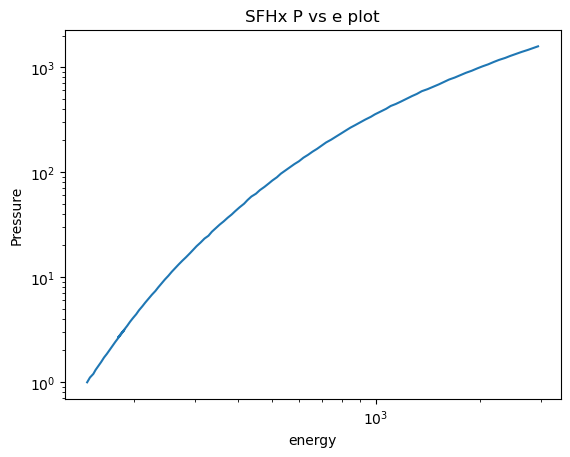

In [387]:
plot.plot(energy,Pressure)
plot.xscale("log")
plot.yscale("log") 
plot.xlabel("energy")
plot.ylabel("Pressure")
plot.title("SFHx P vs e plot")

In [392]:
#Taking the random data

d3 = 2946.389540
d0 = 146.502707



def Curve_fit(d, d1, d2, k1, GA1, GA2, GA3):
    k2 = k1 * (d1**(GA1 - GA2))
    k3 = k2 * (d2**(GA2 - GA3))
    condition1 = (d0 < d) & (d <= d1)
    condition2 = (d1 <= d) & (d <= d2)
    condition3 = (d1 <= d) & (d < d3)
    condition = [condition1, condition2, condition3]
    function_list = [lambda d: k1 *(d**(1/GA1)), lambda d: k2 * (d**(1 / GA2)), lambda d: k3 * (d**(1 / GA3))]
    P = np.piecewise(d, condition, function_list)
    return P
   

# Curve fitting
coeffs, cov = curve_fit(Curve_fit,x,y)

coeffs

/tmp/ipykernel_5202/1984920814.py:10: RuntimeWarning: invalid value encountered in scalar power
  k3 = k2 * (d2**(GA2 - GA3))


array([1.79139338, 0.17964061, 3.73988303, 1.44709078, 0.67442508,
       1.66132264])

In [469]:
#Fit
from functools import partial
p3 = 1579.331445
p0 = 0.991250 
#def E_P()
#def P_E()
#def P_n()
def polytrope_E_P(p, k, gamma):
    return np.array([(_p/k)**(1/gamma) + (_p/(gamma-1)) for _p in p])

#p1 = 2000 
#p2 = 3000
def Curve_fit_polytrope(p, p1, p2, k1, GA1, GA2, GA3):
    k2 = p1/((p1/k1)**(1/GA1) + p1/(GA1-1) - p1/(GA2-1))**GA2
    k3 = p2/((p2/k2)**(1/GA2) + p2/(GA2-1) - p2/(GA3-1))**GA3

    condition1 = p < p1
    condition2 = (p >= p1) & (p < p2)
    condition3 = (p >= p2)
    condition = [condition1, condition2, condition3]
    #print(np.where(~condition1 & ~condition2), np.where(~condition2 & ~condition3), 
    #     np.where(~condition1 & ~condition3))
    #assert 1==2
    Polytrope1 = partial(polytrope_E_P, k=k1, gamma=GA1)#lambda p: (p/k1)**(1/GA1) + (p/(GA1-1))
    Polytrope2 = partial(polytrope_E_P, k=k2, gamma=GA2)#lambda p: (p/k2)**(1/GA2) + (p/(GA2-1))
    Polytrope3 = partial(polytrope_E_P, k=k3, gamma=GA3) #lambda p: (p/k3)**(1/GA3) + (p/(GA3-1))
    function_list = [Polytrope1 , Polytrope2 , Polytrope3]
    d = np.piecewise(p, condition, function_list)
    if np.isnan(d).any() or (d<0).any():
        return 10*np.ones_like(d)
    return np.log(d)
   
 
y = np.log(energy)
x = Pressure


# Curve fitting;
coeffs, cov = curve_fit(Curve_fit_polytrope,x,y,
                                              p0 = [10, 40, 1.2, 1.3, 1.4, 1.2], method='trf')
coeffs

/tmp/ipykernel_5202/4107121323.py:15: RuntimeWarning: invalid value encountered in scalar power
  k3 = p2/((p2/k2)**(1/GA2) + p2/(GA2-1) - p2/(GA3-1))**GA3


array([10. , 40. ,  1.2,  1.3,  1.4,  1.2])

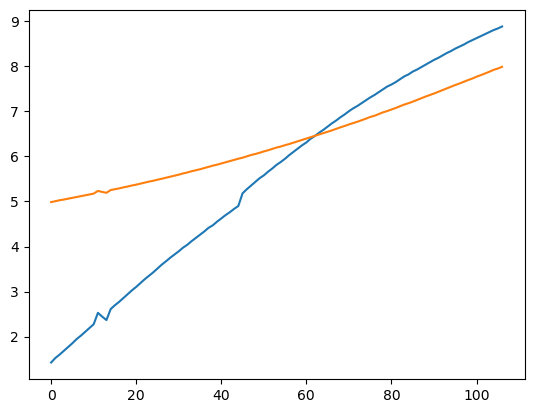

In [466]:
plot.plot(Curve_fit_polytrope(x, 10, 40, 1.2, 1.3, 1.4, 1.2))
plot.plot(y)

In [467]:
infodict

{'fvec': array([5.0129561 , 4.99422463, 4.97166894, 4.95668954, 4.93792921,
        4.91916888, 4.90042298, 4.88164822, 4.86288789, 4.84412756,
        4.82536723, 4.76530532, 4.78784658, 4.80662134, 4.74654499,
        4.72778466, 4.7090099 , 4.68646864, 4.66770831, 4.64516706,
        4.6263923 , 4.60385104, 4.58130978, 4.55875409, 4.53997933,
        4.51743808, 4.49489682, 4.47234113, 4.44979987, 4.42724418,
        4.4046885 , 4.37836631, 4.35579619, 4.32947401, 4.30691832,
        4.28436263, 4.25802601, 4.23170383, 4.20533835, 4.18279709,
        4.15646048, 4.13012386, 4.10377281, 4.0774362 , 4.05108515,
        4.02851503, 3.99841192, 3.96829437, 3.94573869, 3.91940207,
        3.88925566, 3.86291905, 3.83278707, 3.80266953, 3.78008498,
        3.749953  , 3.72361639, 3.69348441, 3.66335244, 3.63322046,
        3.60307406, 3.57295651, 3.54281011, 3.51267813, 3.48253173,
        3.45239975, 3.42226778, 3.38834044, 3.35442754, 3.32428113,
        3.29036823, 3.26022182, 3.230060

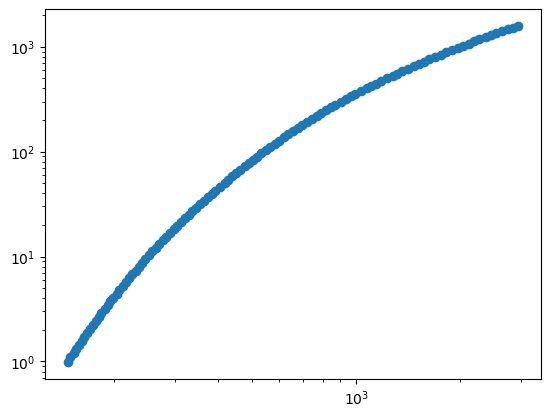

In [414]:
plot.scatter(energy,Pressure)
plot.xscale("log")
plot.yscale("log")